In [ ]:
import streamlit as st
import pandas as pd
import altair as alt
import plotly.express as px

In [ ]:
data = pd.read_csv("data/simulated_data.csv")
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.tail()

In [ ]:
with st.sidebar:
    st.title('🥳 Happiness Dashboard')
    
    year_list = list(data.Date.dt.year.unique())[::-1]
    
    selected_year = st.selectbox('Select a year', year_list, index=len(year_list)-1)
    df_selected_year = data[data.Date.dt.year == selected_year]
    df_selected_year_sorted = df_selected_year.sort_values(by="Happiness_Level", ascending=False)

    color_theme_list = ['blues', 'cividis', 'greens', 'inferno', 'magma', 'plasma', 'reds', 'rainbow', 'turbo', 'viridis']
    selected_color_theme = st.selectbox('Select a color theme', color_theme_list)

In [ ]:
data

In [ ]:
# Plots
# Time Series der Happiness über die Zeit
import plotly.express as px
fig = px.scatter(data, x='Date', y='Happiness_Level',
                 trendline="rolling", trendline_options=dict(window=100),
                 trendline_color_override='Steelblue',
                 trendline_scope='overall')
fig.data = [t for t in fig.data if t.mode == "lines"]
fig.update_layout(yaxis_title='Happiness')
fig.update_traces(line=dict(width=6))
fig.update_traces(showlegend=False)
fig.show()


In [ ]:
# Funktion zum Plotten des Codes
def plot_happiness_level(df):
    fig = px.scatter(df, x='Date', y='Happiness_Level',
                 trendline="rolling", trendline_options=dict(window=100),
                 trendline_color_override='black',
                 trendline_scope='overall')

    return fig

In [ ]:
# Histogram für den jeweilgen Monat
import plotly.express as px

fig = px.histogram(df_selected_year, x='Happiness_Level', 
                   color_discrete_sequence=['steelblue'])
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# Funktion fürs Histogram
def happiness_histogram(df):
    fig = px.histogram(df, x='Happiness_Level', 
                       color_discrete_sequence=['steelblue'])
    fig.update_layout(bargap=0.1)
    return fig

## Sentiment Analysis

In [24]:
from transformers import BertTokenizer, BertModel

In [25]:
df = pd.read_csv('data/simulated_data.csv')
df.head()

,Date,Age_Group,Happiness_Level,Feedback
0,2022-01-01 00:00:00.000000000,31-40,1,Work unhappy disorganized. job. environment an...
1,2022-01-01 08:44:41.081081081,41-50,1,My very stressful work I unhappy is environmen...
2,2022-01-01 17:29:22.162162162,<30,1,My is The with job. stressful disorganized. wo...
3,2022-01-02 02:14:03.243243243,31-40,2,My be my am with my are that job. with my.
4,2022-01-02 10:58:44.324324324,51-60,1,Job. job. with very my environment environment...


In [26]:
## Feature Engineering
from transformers import pipeline

# load that bert-i-boy
sentiment_pipe = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [27]:
texts = df['Feedback'].tolist()

In [28]:
results = sentiment_pipe(texts)

In [29]:
results[:5], texts[:5]

([{'label': 'NEGATIVE', 'score': 0.9988747239112854},
  {'label': 'POSITIVE', 'score': 0.9809092283248901},
  {'label': 'NEGATIVE', 'score': 0.9914621710777283},
  {'label': 'POSITIVE', 'score': 0.998664379119873},
  {'label': 'POSITIVE', 'score': 0.9851456880569458}],
 ['Work unhappy disorganized. job. environment and I I disorganized. The work I my my very job. work my unhappy.',
  'My very stressful work I unhappy is environment very environment job. The is is I.',
  'My is The with job. stressful disorganized. work I.',
  'My be my am with my are that job. with my.',
  'Job. job. with very my environment environment my The stressful is am.'])

In [30]:
# Categorien
import pandas as pd 

df = pd.DataFrame(results)
df['texts'] = texts

def categorize_sentiment(label):
    if label == 'POSITIVE':
        return 'positive'
    elif label == 'NEGATIVE':
        return 'negative'
    else:
        return 'neutral'

In [31]:
# Apply categorization
df['sentiment'] = df['label'].apply(categorize_sentiment)

# Aggregate results
sentiment_counts = df['sentiment'].value_counts()

In [36]:
## Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    if 'text' in df.columns:
        text = " ".join(review for review in df[df['sentiment'] == sentiment]['text'])
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.title(f"Word Cloud for {sentiment.capitalize()} Sentiment")
        plt.axis("off")
        plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'sample_plot.png'

/tmp/ipykernel_94246/2643187333.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


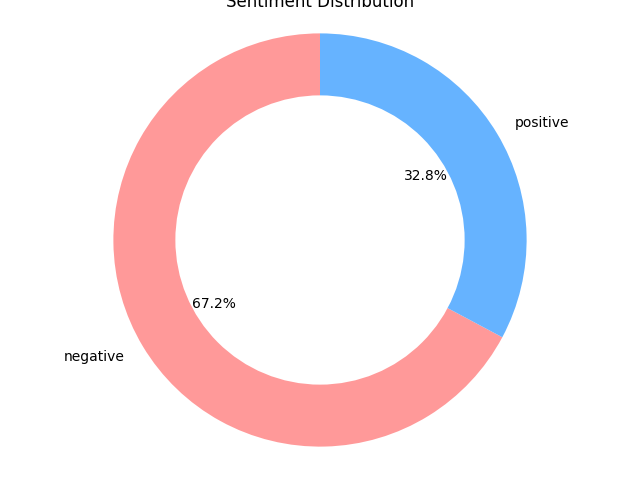

In [37]:
# Create a donut chart
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
 
# Draw a circle at the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Sentiment Distribution")
plt.savefig('sample_plot.png')

plt.show()
Image(filename='sample_plot.png')
